# Epidata description

Insert details here of following work

1. Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import io
import plotly.graph_objects as go

#jupyter nbconvert --to html your_notebook.ipynb
#jupyter nbconvert --to pdf your_notebook.ipynb

In [2]:
df = pd.read_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/msv_zkiph2_2025-03-03_header.csv", sep=";", low_memory=False)

In [8]:
print(df.columns)
df

Index(['ReportingDate', 'Erkrankungsbeginn', 'ReportingWeek',
       'ReportingWeekYear', 'ReportingCounty', 'ReportingDistrict',
       'ReportingState', 'MunicipalityKey', 'MeldeLandkreis',
       'MeldeLandkreisRegierungsbezirk', 'MeldeLandkreisBundesland',
       'CaseDefCategoryComputed', 'FallDefKategorie', 'ReferenceDefComputed',
       'Referenzdefinition', 'KlinikVorhanden', 'ClinicalInfoAvailable',
       'OnsetOfDisease', 'AgeComputed', 'AgeMonth', 'StatusDeceased',
       'DeceasedReason', 'VerstorbenStatus', 'VerstorbenGrund', 'DeceasedDate',
       'ExpositionsortStatus', 'InfektionsortWo', 'HospitalisierungStatus',
       'StatusPlaceOfInf', 'PlaceOfInfRegion', 'StatusHospitalization',
       'OutbreakIdRecord', 'StatusVaccination', 'VaccinationCount',
       'ImpfungStatus', 'ImpfungAnzahl', 'ImpfungDatum', 'PathogenMSV',
       'Genotyp', 'WHOSequenzID', 'MethodeAkIgGDelta', 'MethodeAkIgM',
       'MsvKlassifikation'],
      dtype='object')


,ReportingDate,Erkrankungsbeginn,ReportingWeek,ReportingWeekYear,ReportingCounty,ReportingDistrict,ReportingState,MunicipalityKey,MeldeLandkreis,MeldeLandkreisRegierungsbezirk,...,VaccinationCount,ImpfungStatus,ImpfungAnzahl,ImpfungDatum,PathogenMSV,Genotyp,WHOSequenzID,MethodeAkIgGDelta,MethodeAkIgM,MsvKlassifikation
0,2000-01-31 00:00:00.000,2000-01-25 00:00:00.000,5,2000,11014521,12000145,13000014,NaN,LK Erzgebirgskreis,Chemnitz,...,0,-nicht erhoben-,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN
1,2000-10-07 00:00:00.000,NaN,40,2000,11009261,12000092,13000009,NaN,SK Landshut,Niederbayern,...,0,-nicht ermittelbar-,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN
2,2001-01-01 00:00:00.000,2001-01-04 00:00:00.000,1,2001,11005111,12000051,13000005,NaN,SK Düsseldorf,Düsseldorf,...,0,-nicht erhoben-,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN
3,2001-01-01 00:00:00.000,2001-01-02 00:00:00.000,1,2001,11009372,12000093,13000009,NaN,LK Cham,Oberpfalz,...,-1,Ja,-nicht ermittelbar-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN
4,2001-01-01 00:00:00.000,2001-01-01 00:00:00.000,1,2001,11006436,12000064,13000006,NaN,LK Main-Taunus-Kreis,Darmstadt,...,0,Nein,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27162,2025-02-27 00:00:00.000,2025-02-25 00:00:00.000,9,2025,11005113,12000051,13000005,5113000.0,SK Essen,Düsseldorf,...,0,-nicht ermittelbar-,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN
27163,2025-02-27 00:00:00.000,2025-02-22 00:00:00.000,9,2025,11009162,12000091,13000009,9162000.0,SK München,Oberbayern,...,0,-nicht ermittelbar-,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN
27164,28.02.2025 07:33,2025-02-25 00:00:00.000,9,2025,11005358,12000053,13000005,NaN,LK Düren,Köln,...,0,Nein,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN
27165,2025-03-03 00:00:00.000,2025-02-20 00:00:00.000,10,2025,11009162,12000091,13000009,9162000.0,SK München,Oberbayern,...,0,Nein,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN


create file to describe get values(count, min, max), non null, type, unique and missing values

In [4]:
# Save the values(count, min, max) of the DataFrame to a CSV file
df_describe = df.describe().loc[['count', 'min', 'max']]
df_describe = df_describe.T
df_describe.to_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/results/description/epi-data_describe.csv")
print("saved describe values to epi-data_describe.csv")

# Save the info (non null and type) of the DataFrame to a CSV file
buffer = io.StringIO()
df.info(buf=buffer)
lines = buffer.getvalue().splitlines()
df_info = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())
       .drop('Count',axis=1).drop('#', axis=1)
       .rename(columns={'Non-Null':'Non-Null Count'}))
df_info.to_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/results/description/epi-data_info.csv")
print("saved info values to epi-data_info.csv")

# Save the number of unique values for each column
df_nunique =  df.nunique()
df.nunique().to_string(buf=buffer)  # Correct way to use a buffer
df_nunique.to_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/results/description/epi-data_nunique.csv")
print("saved unique values to epi-data_nunique.csv")

# Save the number of missing values for each column
df_missing = df.isnull().sum()
df_missing.to_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/results/description/epi-data_missing.csv")
print("saved null values to epi-data_missing.csv")


saved describe values to epi-data_describe.csv
saved info values to epi-data_info.csv
saved unique values to epi-data_nunique.csv
saved null values to epi-data_missing.csv


In [7]:
#!pip install --upgrade nbformat

In [6]:
df = pd.read_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/msv_zkiph2_2025-03-03_header.csv", sep=";", low_memory=False)
df['ReportingDate'] = df['ReportingDate'].astype(str)
df['ReportingDate'] = pd.to_datetime(df['ReportingDate'], format='mixed', errors='coerce')
df['ReportingDate'] = pd.to_datetime(df['ReportingDate'], format='%Y-%m-%d')
df['ReportingDate_year'] = df['ReportingDate'].dt.year
df['ReportingDate_month'] = df['ReportingDate'].dt.month
#df['ReportingDate'] = df['ReportingDate'].dt.date

print(df['ReportingDate'].dtype)
df

datetime64[ns]


,ReportingDate,Erkrankungsbeginn,ReportingWeek,ReportingWeekYear,ReportingCounty,ReportingDistrict,ReportingState,MunicipalityKey,MeldeLandkreis,MeldeLandkreisRegierungsbezirk,...,ImpfungAnzahl,ImpfungDatum,PathogenMSV,Genotyp,WHOSequenzID,MethodeAkIgGDelta,MethodeAkIgM,MsvKlassifikation,ReportingDate_year,ReportingDate_month
0,2000-01-31 00:00:00,2000-01-25 00:00:00.000,5,2000,11014521,12000145,13000014,NaN,LK Erzgebirgskreis,Chemnitz,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2000,1
1,2000-10-07 00:00:00,NaN,40,2000,11009261,12000092,13000009,NaN,SK Landshut,Niederbayern,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2000,10
2,2001-01-01 00:00:00,2001-01-04 00:00:00.000,1,2001,11005111,12000051,13000005,NaN,SK Düsseldorf,Düsseldorf,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2001,1
3,2001-01-01 00:00:00,2001-01-02 00:00:00.000,1,2001,11009372,12000093,13000009,NaN,LK Cham,Oberpfalz,...,-nicht ermittelbar-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2001,1
4,2001-01-01 00:00:00,2001-01-01 00:00:00.000,1,2001,11006436,12000064,13000006,NaN,LK Main-Taunus-Kreis,Darmstadt,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27162,2025-02-27 00:00:00,2025-02-25 00:00:00.000,9,2025,11005113,12000051,13000005,5113000.0,SK Essen,Düsseldorf,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2025,2
27163,2025-02-27 00:00:00,2025-02-22 00:00:00.000,9,2025,11009162,12000091,13000009,9162000.0,SK München,Oberbayern,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN,2025,2
27164,2025-02-28 07:33:00,2025-02-25 00:00:00.000,9,2025,11005358,12000053,13000005,NaN,LK Düren,Köln,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Ja,NaN,2025,2
27165,2025-03-03 00:00:00,2025-02-20 00:00:00.000,10,2025,11009162,12000091,13000009,9162000.0,SK München,Oberbayern,...,-nicht erhoben-,NaN,0,-nicht erhoben-,0,Nein,Nein,NaN,2025,3


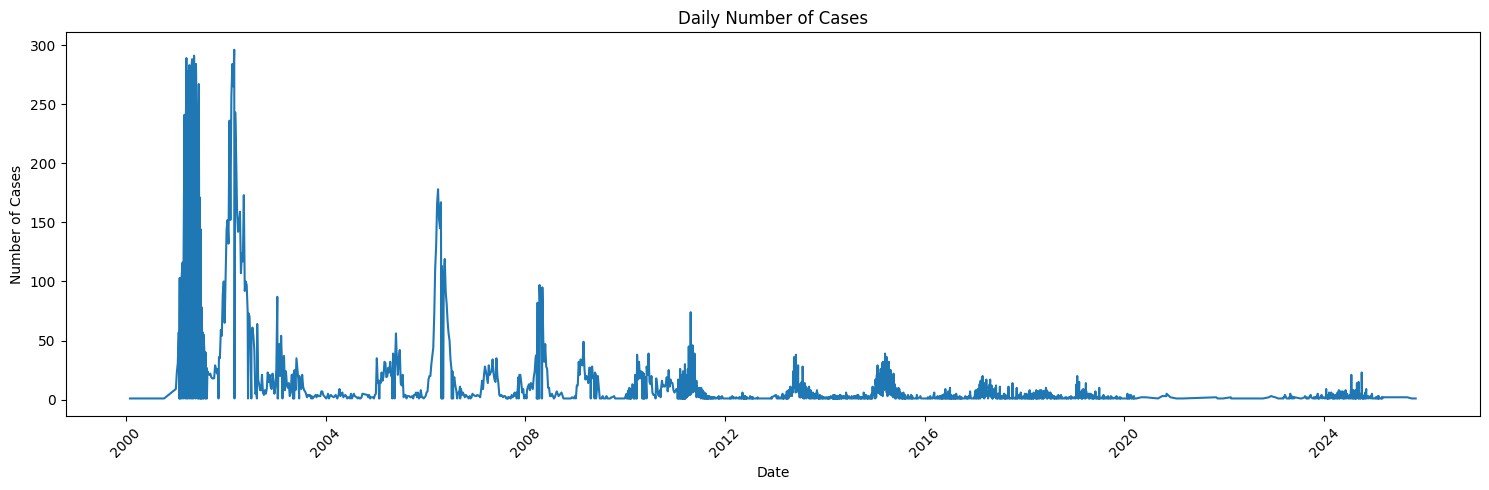

In [82]:
#df['ReportingDate'] = pd.to_datetime(df['ReportingDate'], format='%Y-%m-%d')
case_counts = df.groupby('ReportingDate').size()
#plt.plot(df['EingangsDatum_year'], df.index)


plt.figure(figsize=(15, 5))
plt.plot(case_counts.index, case_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

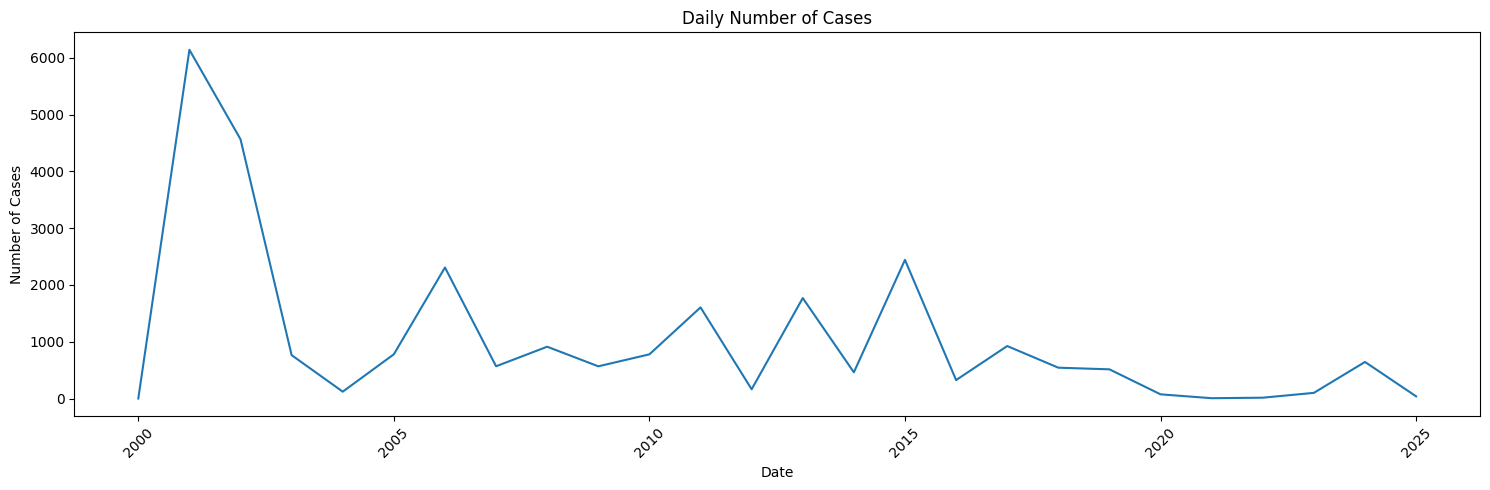

In [ ]:
case_counts_year = df.groupby('ReportingDate_year').size()


plt.figure(figsize=(15, 5))
plt.plot(case_counts_year.index, case_counts_year.values)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()